In [111]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers ,models
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

Load the dataset

In [89]:
(x_train,y_train) , (x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

split it into training and validation sets

In [90]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [91]:
x_val = x_val / 255 #normalize validation set

In [92]:
x_train[0]

array([[[34, 36, 43],
        [37, 37, 51],
        [44, 44, 64],
        ...,
        [62, 73, 93],
        [52, 63, 83],
        [45, 57, 77]],

       [[35, 35, 37],
        [34, 34, 40],
        [34, 33, 43],
        ...,
        [58, 69, 89],
        [50, 60, 80],
        [47, 58, 78]],

       [[34, 33, 35],
        [33, 32, 36],
        [33, 32, 38],
        ...,
        [66, 77, 97],
        [51, 62, 82],
        [53, 64, 84]],

       ...,

       [[32, 32, 38],
        [32, 31, 37],
        [33, 33, 38],
        ...,
        [41, 38, 45],
        [34, 31, 38],
        [36, 32, 40]],

       [[33, 31, 36],
        [32, 30, 36],
        [34, 32, 37],
        ...,
        [37, 35, 40],
        [32, 29, 35],
        [30, 28, 33]],

       [[37, 32, 35],
        [37, 32, 36],
        [37, 33, 36],
        ...,
        [49, 47, 49],
        [47, 45, 48],
        [58, 56, 58]]], dtype=uint8)

In [93]:
x_test.shape

(10000, 32, 32, 3)

In [94]:
y_train[:5]

array([[6],
       [2],
       [5],
       [6],
       [3]], dtype=uint8)

In [95]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 2, 5, 6, 3], dtype=uint8)

In [96]:
classes = ["airplan","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [97]:
def plot_sample(x,y, index):
    plt.figure(figsize =(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

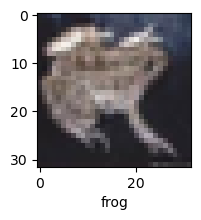

In [98]:
plot_sample(x_train, y_train, 0 )

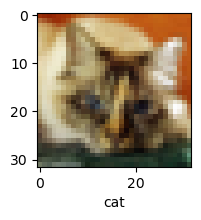

In [99]:
plot_sample(x_train, y_train, 4 )

Normalizing the training data

In [100]:
x_train = x_train / 255
x_test = x_test / 255

Build simple artificial neural network for image classification

In [101]:
#Build simple artificial neural network for image classification
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
ann.fit(x_train, y_train, epochs=5)


Epoch 1/5
1250/1250 [==============================] - 27s 21ms/step - loss: 1.8391 - accuracy: 0.3448
Epoch 2/5
1250/1250 [==============================] - 26s 21ms/step - loss: 1.6549 - accuracy: 0.4159
Epoch 3/5
1250/1250 [==============================] - 26s 21ms/step - loss: 1.5716 - accuracy: 0.4476
Epoch 4/5
1250/1250 [==============================] - 27s 21ms/step - loss: 1.5127 - accuracy: 0.4689
Epoch 5/5
1250/1250 [==============================] - 26s 21ms/step - loss: 1.4635 - accuracy: 0.4872


You can see that at the end of 5 epochs, accuracy is at around 49%

evaluate  performance on the validation set

In [102]:
ann.evaluate(x_val, y_val)

313/313 [==============================] - 2s 4ms/step - loss: 1.4863 - accuracy: 0.4678


[1.48634934425354, 0.46779999136924744]

In [103]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.62      0.56      1000
           1       0.63      0.53      0.57      1000
           2       0.41      0.26      0.31      1000
           3       0.36      0.28      0.31      1000
           4       0.49      0.25      0.33      1000
           5       0.42      0.35      0.38      1000
           6       0.41      0.70      0.52      1000
           7       0.45      0.63      0.53      1000
           8       0.69      0.51      0.58      1000
           9       0.47      0.65      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.48      0.48      0.47     10000



313/313 [==============================] - 1s 5ms/step


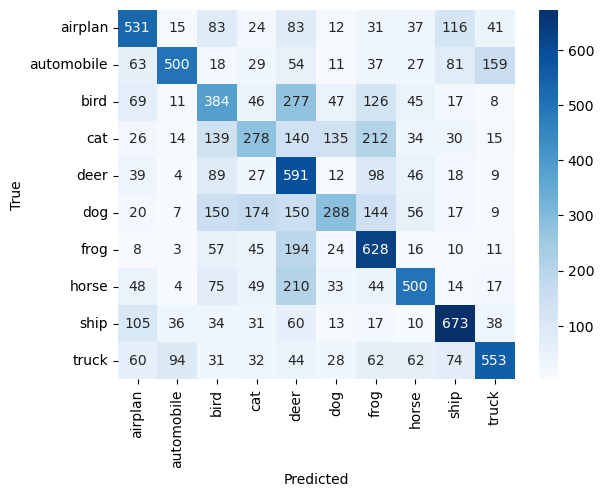

In [112]:
y_pred_classes_ann = [np.argmax(element) for element in ann.predict(x_val)]
cm_ann = confusion_matrix(y_val, y_pred_classes_ann)

sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [104]:
cnn = models.Sequential([
    #cnn 
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    

    #DENSE
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')    
    ])

In [105]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [106]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4797 - accuracy: 0.4704
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1311 - accuracy: 0.6009
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9921 - accuracy: 0.6526
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8977 - accuracy: 0.6880
Epoch 5/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8264 - accuracy: 0.7141
Epoch 6/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.7595 - accuracy: 0.7359
Epoch 7/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6974 - accuracy: 0.7571
Epoch 8/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6489 - accuracy: 0.7730
Epoch 9/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.5999 - accuracy: 0.7910
Epoch 10/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.558

With CNN, at the end 10 epochs, accuracy was at around 80% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

313/313 [==============================] - 1s 4ms/step


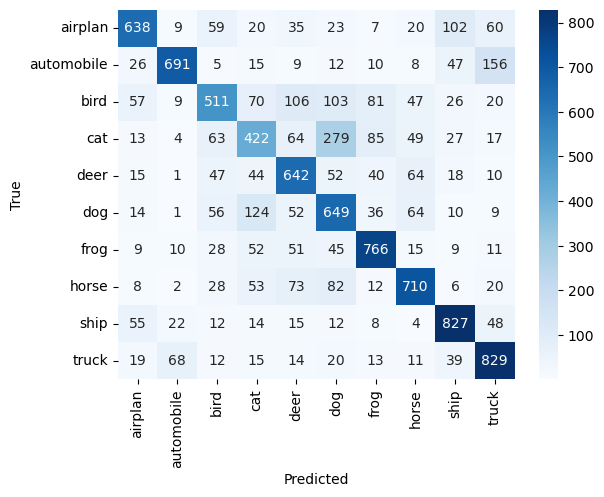

In [114]:
y_pred_classes_cnn = [np.argmax(element) for element in cnn.predict(x_val)]
cm_cnn = confusion_matrix(y_val, y_pred_classes_cnn)

sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [107]:
cnn.evaluate(x_val, y_val)

313/313 [==============================] - 1s 4ms/step - loss: 0.9668 - accuracy: 0.6867


[0.966813862323761, 0.6866999864578247]

 visualize the training history:

In [108]:
history_ann = ann.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
history_cnn = cnn.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/5
1250/1250 [==============================] - 28s 23ms/step - loss: 1.4180 - accuracy: 0.5042 - val_loss: 1.4901 - val_accuracy: 0.4688
Epoch 2/5
1250/1250 [==============================] - 27s 22ms/step - loss: 1.3793 - accuracy: 0.5160 - val_loss: 1.4749 - val_accuracy: 0.4687
Epoch 3/5
1250/1250 [==============================] - 27s 21ms/step - loss: 1.3467 - accuracy: 0.5292 - val_loss: 1.4303 - val_accuracy: 0.4958
Epoch 4/5
1250/1250 [==============================] - 28s 22ms/step - loss: 1.3132 - accuracy: 0.5394 - val_loss: 1.4029 - val_accuracy: 0.5003
Epoch 5/5
1250/1250 [==============================] - 28s 22ms/step - loss: 1.2818 - accuracy: 0.5500 - val_loss: 1.4408 - val_accuracy: 0.4926
Epoch 1/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.5169 - accuracy: 0.8174 - val_loss: 1.0027 - val_accuracy: 0.6879
Epoch 2/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.4798 - accuracy: 0.8317 - val_loss: 1.0330 - val_accu

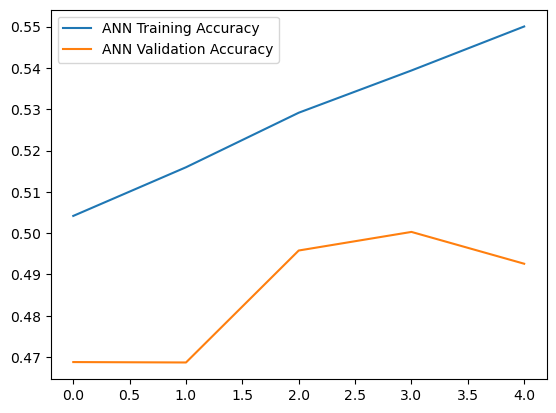

In [109]:
plt.plot(history_ann.history['accuracy'], label='ANN Training Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='ANN Validation Accuracy')
plt.legend()
plt.show()

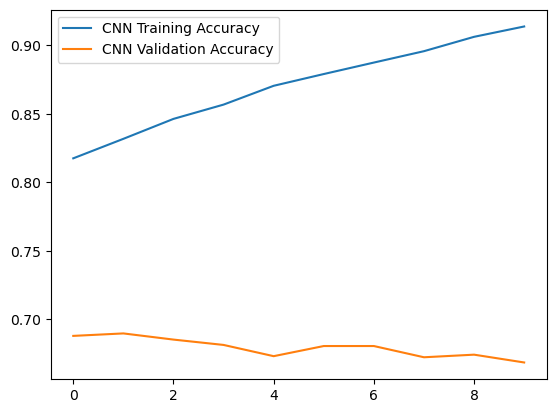

In [110]:
plt.plot(history_cnn.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy')
plt.legend()
plt.show()

In [29]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[4.9177551e-04, 4.9014704e-04, 5.5467832e-04, 8.0445123e-01,
        6.7153160e-05, 4.5645010e-02, 2.2979502e-03, 4.8137870e-05,
        1.4483395e-01, 1.1199063e-03],
       [9.0403862e-02, 5.3328383e-01, 1.2499538e-05, 1.6996327e-06,
        1.6886328e-07, 8.3129539e-09, 4.0226414e-06, 4.3767294e-08,
        3.5362592e-01, 2.2667915e-02],
       [3.7056185e-02, 2.6308292e-01, 4.3356800e-03, 1.0333645e-02,
        7.4551571e-03, 8.5246755e-04, 4.1756572e-04, 9.5222834e-03,
        4.5996016e-01, 2.0698404e-01],
       [8.3124584e-01, 1.1950235e-02, 7.5350967e-03, 1.0935744e-04,
        5.6367922e-03, 8.3311124e-06, 7.5344076e-05, 1.7465973e-04,
        1.4311811e-01, 1.4622888e-04],
       [5.3471075e-07, 2.4991985e-05, 1.4501819e-02, 7.4906304e-02,
        3.7453675e-01, 2.7789366e-03, 5.3322947e-01, 1.4039996e-05,
        6.7485976e-06, 3.5695655e-07]], dtype=float32)

In [30]:
classes

['airplan',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [33]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[3, 1, 8, 0, 6]

In [38]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

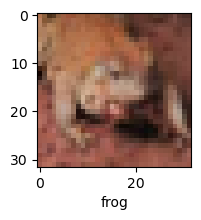

In [41]:
plot_sample(x_test, y_test,5)

In [42]:
classes[y_classes[5]]

'frog'

In [43]:
print("Classification Report: \n", classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.72      0.73      1000
           1       0.80      0.81      0.81      1000
           2       0.62      0.56      0.59      1000
           3       0.50      0.52      0.51      1000
           4       0.63      0.68      0.66      1000
           5       0.61      0.61      0.61      1000
           6       0.79      0.74      0.77      1000
           7       0.77      0.71      0.74      1000
           8       0.78      0.81      0.80      1000
           9       0.73      0.80      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

